In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib as mpl
# mpl.rcParams['axes.grid'] = False
import numpy as np
import itertools
import scipy

In [2]:
hct = pd.read_excel("data/Results_data_Nov.xlsx", sheet_name="H clusters")
ntpm = pd.read_csv("../combined_analyses/Nov10_df_tpm_only.tsv", sep="\t")
rem_data = ["SRR16676600" ,"SRR16676584","SRR16676538" ,"SRR16676457" ,"SRR17319821","SRR17319820"]
w_ep = pd.read_excel("data/Results_data_Nov.xlsx", sheet_name="W  Expression Patterns")
pways =  pd.read_csv("../genes_pathways.tsv", sep="\t", header=None)
pways.columns = ["gene", "hsa", "description"]
mdata = pd.read_csv("../all_metadata_jan24_23.csv")
mdata = mdata[mdata['Run'].isin(list(hct.columns))]
mdata = mdata[~mdata['Run'].isin(rem_data)]
mdata = mdata.dropna(axis=1, how="all")
mdata = mdata.drop([col for col in mdata.columns if mdata[col].nunique() <= 1], axis=1)
mdata = mdata.drop(["DATASTORE_filetype", "DATASTORE_provider", "DATASTORE_region"], axis=1).reset_index()
mdata.shape
# hct.head()

(160, 21)

In [3]:
ntpm.shape


(37913, 168)

In [4]:
mdata.groupby(['Bioproject', 'Center_Name']).count()
mdata.groupby(['Bioproject', 'Genotype']).count()
mdata.groupby(['Bioproject', 'Infection']).count()

mdata.groupby(['Bioproject', 'Infection']).count().head()

index  Run  AvgSpotLen  Bases  BioSample  \
Bioproject  Infection                                                           
PRJNA776746 control                     66   66          66     66         66   
            influenza A virus           60   60          60     60         60   
PRJNA791847 Influenza A virus (IAV)      4    4           4      4          4   
            Uninfected                   4    4           4      4          4   
PRJNA809199 influenza B                 11   11          11     11         11   

                                     Bytes  Cell_type_line  Center_Name  \
Bioproject  Infection                                                     
PRJNA776746 control                     66              66           66   
            influenza A virus           60              60           60   
PRJNA791847 Influenza A virus (IAV)      4               0            4   
            Uninfected                   4               0            4   
PRJNA809199 influenza B                 11               0           11   

                                     Experiment  GEO_Accession_exp  \
Bioproject  Infection                                                
PRJNA776746 control                          66                 66   
            influenza A virus                60                 60   
PRJNA791847 Influenza A virus (IAV)           4                  4   
            Uninfected                        4                  4   
PRJNA809199 influenza B                      11                 11   

                                     ReleaseDate  Sample_Name  Source_Name  \
Bioproject  Infection                                                        
PRJNA776746 control                           66           66           66   
            influenza A virus                 60           60           60   
PRJNA791847 Influenza A virus (IAV)            4            4            4   
            Uninfected                         4            4            4   
PRJNA809199 influenza B                       11           11           11   

                                     SRA_Study  Genotype  Treatment  \
Bioproject  Infection                                                 
PRJNA776746 control                         66         0          0   
            influenza A virus               60         0          0   
PRJNA791847 Influenza A virus (IAV)          4         0          0   
            Uninfected                       4         0          0   
PRJNA809199 influenza B                     11         0         11   

                                     treatment_time  Patient_Number  Condition  
Bioproject  Infection                                                           
PRJNA776746 control                              66               0         66  
            influenza A virus                    60               0         60  
PRJNA791847 Influenza A virus (IAV)               0               4          0  
            Uninfected                            0               4          0  
PRJNA809199 influenza B                           0               0          0

In [5]:
pct = mdata.groupby('Bioproject').count().reset_index()[['Bioproject','Run']] # project count
pct


,Bioproject,Run
0,PRJNA776746,126
1,PRJNA791847,8
2,PRJNA809199,14
3,PRJNA849574,12


In [6]:
bav = mdata.groupby(['Bioproject']).mean().reset_index()[['Bioproject','Bases']] # bytes average
bav

/var/folders/_y/v6jgnhsn30sd9g2phyp5_5bh000xd6/T/ipykernel_9001/3502816767.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bav = mdata.groupby(['Bioproject']).mean().reset_index()[['Bioproject','Bases']] # bytes average


,Bioproject,Bases
0,PRJNA776746,5.493279e+09
1,PRJNA791847,5.709463e+09
2,PRJNA809199,1.421235e+10
3,PRJNA849574,3.404435e+10


In [7]:
tissue_type = {'PRJNA494313': "A549",
                'PRJNA664043': "A549",
                "PRJNA681319": "A549",
                "PRJNA722929": "A549",
                "PRJNA776746": "human_airway_epithelial",
                "PRJNA795161": "HBEC",
                'PRJNA706691': 'adenocarcinomic human alveolar basal epithelial',
                "PRJNA849574": "A549",
                "PRJNA688321": "nasal_turbinate + lung tissue",
                "PRJNA789923":"Ex vivo reconstuted airway epithelia",
                "PRJNA809199": "lungs",
                "PRJNA791847": "lungs"
                }

# mdata[['Source_Name', 'Tissue', 'Cell_type_line']]
mdata.groupby(['Bioproject', 'Cell_type_line' ]).count()
mdata[mdata['Bioproject'] == "PRJNA688321"].dropna(axis=1)
mdata[mdata['Bioproject'] == "PRJNA791847"].dropna(axis=1)
mdata[mdata['Bioproject'] == "PRJNA809199"].dropna(axis=1).head()

# PRJNA809199

,index,Bioproject,Run,AvgSpotLen,Bases,BioSample,Bytes,Center_Name,Experiment,GEO_Accession_exp,ReleaseDate,Sample_Name,Source_Name,SRA_Study,Infection,Treatment
20,126,PRJNA809199,SRR18097077,222,13130901732,SAMN26156330,3957514952,"INFECTION GENETICS, HZI",SRX14248033,GSM5910113,2022-08-31T00:00:00Z,GSM5910113,lung,SRP360905,influenza B,FluB_337_24hpi
21,127,PRJNA809199,SRR18097078,222,13170579570,SAMN26156331,3959681386,"INFECTION GENETICS, HZI",SRX14248032,GSM5910112,2022-08-31T00:00:00Z,GSM5910112,lung,SRP360905,mock,Mock_48hpi
22,128,PRJNA809199,SRR18097079,222,12414486198,SAMN26156332,3736340204,"INFECTION GENETICS, HZI",SRX14248031,GSM5910111,2022-08-31T00:00:00Z,GSM5910111,lung,SRP360905,influenza B,FluB_Bay_48hpi
23,129,PRJNA809199,SRR18097080,222,15349350174,SAMN26156333,4618940358,"INFECTION GENETICS, HZI",SRX14248030,GSM5910110,2022-08-31T00:00:00Z,GSM5910110,lung,SRP360905,influenza B,FluB_Bay_24hpi
24,130,PRJNA809199,SRR18097081,222,16188297942,SAMN26156334,4873256926,"INFECTION GENETICS, HZI",SRX14248029,GSM5910109,2022-08-31T00:00:00Z,GSM5910109,lung,SRP360905,influenza B,FluB_337_48hpi


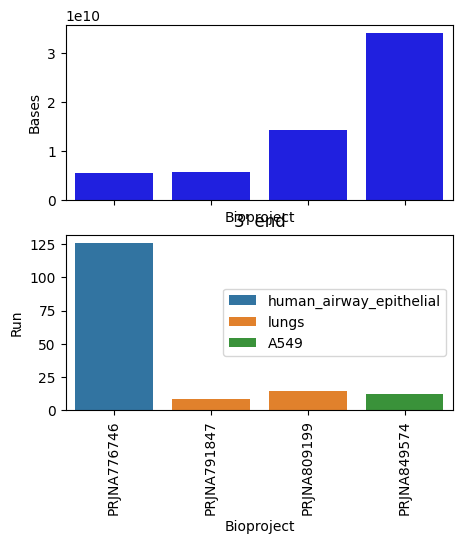

In [8]:
pct['tissue'] = pct['Bioproject'].map(tissue_type)
fig, axs = plt.subplots(nrows = 2, ncols =1, figsize=(5,5),sharex=True, facecolor='w', edgecolor='k')

sns.barplot(data=pct, x="Bioproject", y="Run", ax=axs[1], hue= "tissue", dodge=False)
sns.barplot(data=bav, x="Bioproject", y="Bases", ax=axs[0], color="blue")
axs[1].set_title("3' end")
plt.xticks(rotation = 90)
plt.legend(loc='right')
plt.show()


<AxesSubplot: >

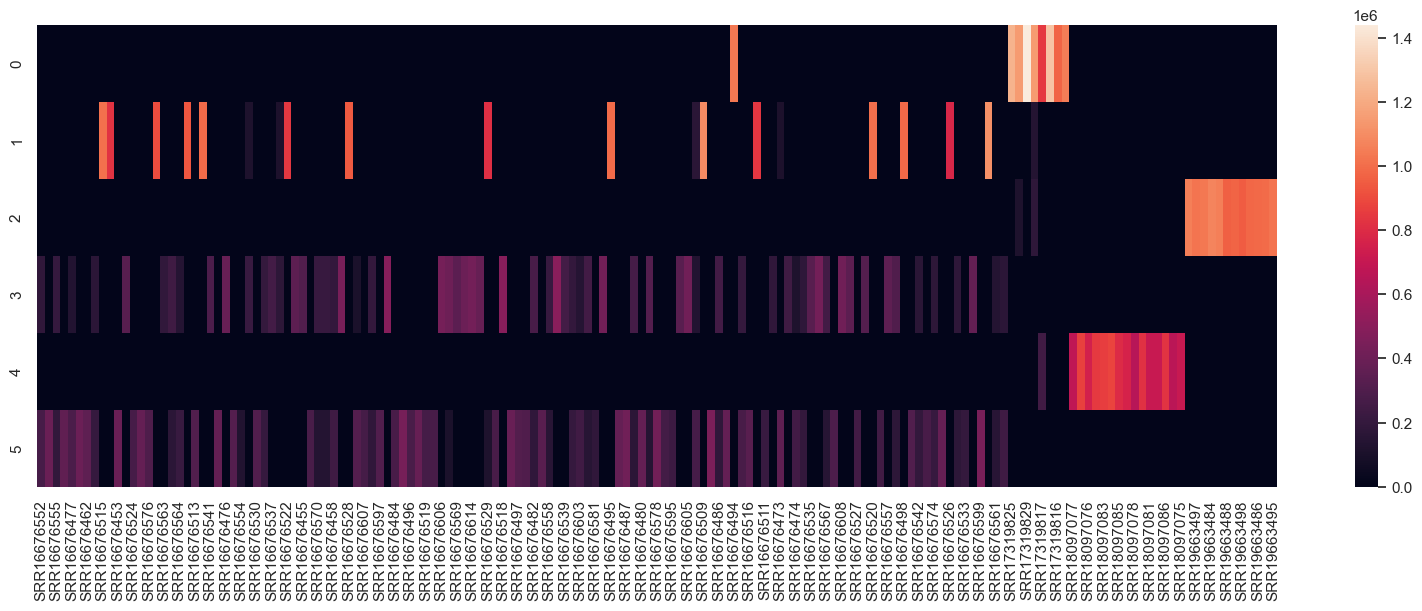

In [9]:
sns.set(rc={'figure.figsize':(20,6)})
sns.heatmap(hct.iloc[: ,0:])

In [10]:
# Hcluster 0
hc0 = hct.iloc[0,0:][hct.iloc[0,0:] > 0]
hc0d = pd.DataFrame(hc0).reset_index() # head cluster 1 dataframe
hc0d.columns = ['srr', 'score']
hc0d.merge(mdata, how="left", left_on="srr", right_on="Run").dropna(axis=1)[['srr', 'score', 'Bioproject', 'Run',
       'Bases', 'BioSample', 'Bytes', 'Center_Name',
       'Experiment', 'GEO_Accession_exp',
       'Sample_Name', 'Source_Name', 'SRA_Study', 'Infection']]

,srr,score,Bioproject,Run,Bases,BioSample,Bytes,Center_Name,Experiment,GEO_Accession_exp,Sample_Name,Source_Name,SRA_Study,Infection
0,SRR16676494,1.033686e+06,PRJNA776746,SRR16676494,4564775700,SAMN22818730,1416090971,WYSS INSTITUTE,626776,GSM5663576,GSM5663576,Human airway epithelial cells,SRP344018,influenza A virus
1,SRR17319825,1.228763e+06,PRJNA791847,SRR17319825,5937957169,SAMN24365610,1900302736,RESEARCH GROUP BIOMARKERS FOR INFECTIOUS DISEA...,SRX13496343,GSM5750638,GSM5750638,lung,SRP352272,Influenza A virus (IAV)
2,SRR17319824,1.145807e+06,PRJNA791847,SRR17319824,4334052887,SAMN24365609,1393726386,RESEARCH GROUP BIOMARKERS FOR INFECTIOUS DISEA...,SRX13496344,GSM5750639,GSM5750639,lung,SRP352272,Uninfected
3,SRR17319829,1.440344e+06,PRJNA791847,SRR17319829,6164848938,SAMN24365614,1979755323,RESEARCH GROUP BIOMARKERS FOR INFECTIOUS DISEA...,SRX13496339,GSM5750634,GSM5750634,lung,SRP352272,Influenza A virus (IAV)
4,SRR17319828,1.145382e+06,PRJNA791847,SRR17319828,5617484877,SAMN24365613,1836038785,RESEARCH GROUP BIOMARKERS FOR INFECTIOUS DISEA...,SRX13496340,GSM5750635,GSM5750635,lung,SRP352272,Uninfected
5,SRR17319817,8.459430e+05,PRJNA791847,SRR17319817,5786198142,SAMN24365602,1871069389,RESEARCH GROUP BIOMARKERS FOR INFECTIOUS DISEA...,SRX13496351,GSM5750646,GSM5750646,lung,SRP352272,Influenza A virus (IAV)
6,SRR17319833,1.289887e+06,PRJNA791847,SRR17319833,6579907127,SAMN24365618,2107263736,RESEARCH GROUP BIOMARKERS FOR INFECTIOUS DISEA...,SRX13496335,GSM5750630,GSM5750630,lung,SRP352272,Influenza A virus (IAV)
7,SRR17319816,9.695795e+05,PRJNA791847,SRR17319816,6087594645,SAMN24365601,1947349983,RESEARCH GROUP BIOMARKERS FOR INFECTIOUS DISEA...,SRX13496352,GSM5750647,GSM5750647,lung,SRP352272,Uninfected
8,SRR17319832,1.049153e+06,PRJNA791847,SRR17319832,5167659111,SAMN24365617,1654473630,RESEARCH GROUP BIOMARKERS FOR INFECTIOUS DISEA...,SRX13496336,GSM5750631,GSM5750631,lung,SRP352272,Uninfected


<AxesSubplot: >

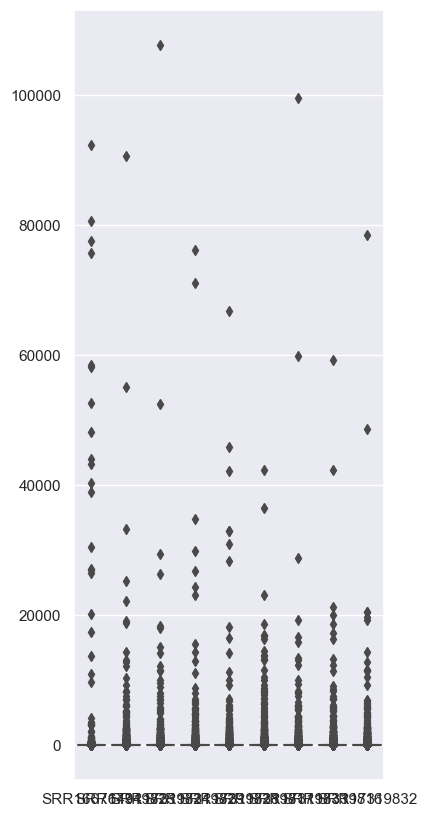

In [11]:
hc0srr = hc0d['srr'].to_list()
hc0srr.append('id')
hc0tpm = ntpm[hc0srr].dropna(how="any")
hc0tpm.index = hc0tpm['id']
hc0tpm = hc0tpm.drop(['id'], axis=1)
hc0tpm = hc0tpm.loc[~(hc0tpm==0).all(axis=1)]

sns.set(rc={'figure.figsize':(4,10)})
    
sns.boxplot(data=hc0tpm)
# hc0tpm
# ntpm.head()

In [12]:
# Hcluster 1
hc1 = hct.iloc[1,0:][hct.iloc[1,0:] > 0]
hc1d = pd.DataFrame(hc1).reset_index() # head cluster 1 dataframe
hc1d.columns = ['srr', 'score']
hc1d.merge(mdata, how="left", left_on="srr", right_on="Run").dropna(axis=1)[['srr', 'score', 'Bioproject', 'Run',  'AvgSpotLen',
        'BioSample', 'Bytes', 'Center_Name', 
       'Experiment', 'GEO_Accession_exp', 
       'ReleaseDate', 'Sample_Name', 'Source_Name', 'SRA_Study', 'Infection']]
# hc1d

,srr,score,Bioproject,Run,AvgSpotLen,BioSample,Bytes,Center_Name,Experiment,GEO_Accession_exp,ReleaseDate,Sample_Name,Source_Name,SRA_Study,Infection
0,SRR16676515,1.009032e+06,PRJNA776746,SRR16676515,100,SAMN22818751,1223507662,WYSS INSTITUTE,626776,GSM5663555,2022-04-01T00:00:00Z,GSM5663555,Human airway epithelial cells,SRP344018,control
1,SRR16676512,8.254448e+05,PRJNA776746,SRR16676512,100,SAMN22818748,1166019915,WYSS INSTITUTE,626776,GSM5663558,2022-04-01T00:00:00Z,GSM5663558,Human airway epithelial cells,SRP344018,control
2,SRR16676523,9.045880e+05,PRJNA776746,SRR16676523,100,SAMN22818759,1214687594,WYSS INSTITUTE,626776,GSM5663547,2022-04-01T00:00:00Z,GSM5663547,Human airway epithelial cells,SRP344018,influenza A virus
3,SRR16676531,9.309360e+05,PRJNA776746,SRR16676531,100,SAMN22818767,1191980009,WYSS INSTITUTE,626776,GSM5663539,2022-04-01T00:00:00Z,GSM5663539,Human airway epithelial cells,SRP344018,control
4,SRR16676514,9.907026e+05,PRJNA776746,SRR16676514,100,SAMN22818750,1261934341,WYSS INSTITUTE,626776,GSM5663556,2022-04-01T00:00:00Z,GSM5663556,Human airway epithelial cells,SRP344018,control
5,SRR16676553,1.162295e+05,PRJNA776746,SRR16676553,100,SAMN22818789,1727168180,WYSS INSTITUTE,655308,GSM5663517,2022-04-01T00:00:00Z,GSM5663517,Human airway epithelial cells,SRP344018,control
6,SRR16676562,1.105292e+05,PRJNA776746,SRR16676562,100,SAMN22818798,2321202777,WYSS INSTITUTE,655308,GSM5663508,2022-04-01T00:00:00Z,GSM5663508,Human airway epithelial cells,SRP344018,influenza A virus
7,SRR16676522,8.405158e+05,PRJNA776746,SRR16676522,100,SAMN22818758,1645478764,WYSS INSTITUTE,626776,GSM5663548,2022-04-01T00:00:00Z,GSM5663548,Human airway epithelial cells,SRP344018,influenza A virus
8,SRR16676528,9.421367e+05,PRJNA776746,SRR16676528,100,SAMN22818764,1068221012,WYSS INSTITUTE,626776,GSM5663542,2022-04-01T00:00:00Z,GSM5663542,Human airway epithelial cells,SRP344018,control
9,SRR16676529,8.148181e+05,PRJNA776746,SRR16676529,100,SAMN22818765,577430661,WYSS INSTITUTE,626776,GSM5663541,2022-04-01T00:00:00Z,GSM5663541,Human airway epithelial cells,SRP344018,control


In [13]:
# Hcluster 2
hc2 = hct.iloc[2,0:][hct.iloc[2,0:] > 0]
hc2d = pd.DataFrame(hc2).reset_index() # head cluster 1 dataframe
hc2d.columns = ['srr', 'score']
hc2d.merge(mdata, how="left", left_on="srr", right_on="Run").dropna(axis=1)[['srr', 'score', 'Bioproject', 'Run',
        'BioSample', 'Bytes', 'Center_Name', 
       'Experiment', 'GEO_Accession_exp',  
       'Sample_Name', 'Source_Name', 'SRA_Study', 'Infection']]

,srr,score,Bioproject,Run,BioSample,Bytes,Center_Name,Experiment,GEO_Accession_exp,Sample_Name,Source_Name,SRA_Study,Infection
0,SRR17319824,1.137346e+05,PRJNA791847,SRR17319824,SAMN24365609,1393726386,RESEARCH GROUP BIOMARKERS FOR INFECTIOUS DISEA...,SRX13496344,GSM5750639,GSM5750639,lung,SRP352272,Uninfected
1,SRR17319828,1.757062e+05,PRJNA791847,SRR17319828,SAMN24365613,1836038785,RESEARCH GROUP BIOMARKERS FOR INFECTIOUS DISEA...,SRX13496340,GSM5750635,GSM5750635,lung,SRP352272,Uninfected
2,SRR19663485,1.056242e+06,PRJNA849574,SRR19663485,SAMN29094698,30870267143,"INFECTION GENETICS, HZI",SRX15713024,GSM6245814,GSM6245814,A549,SRP381896,PR8
3,SRR19663497,1.022373e+06,PRJNA849574,SRR19663497,SAMN29094710,9299375708,"INFECTION GENETICS, HZI",SRX15713012,GSM6245802,GSM6245802,A549,SRP381896,PR8
4,SRR19663496,1.030983e+06,PRJNA849574,SRR19663496,SAMN29094709,9290727377,"INFECTION GENETICS, HZI",SRX15713013,GSM6245803,GSM6245803,A549,SRP381896,PR8
5,SRR19663484,1.073057e+06,PRJNA849574,SRR19663484,SAMN29094697,8420704667,"INFECTION GENETICS, HZI",SRX15713025,GSM6245815,GSM6245815,A549,SRP381896,PR8
6,SRR19663483,1.053051e+06,PRJNA849574,SRR19663483,SAMN29094696,10271100820,"INFECTION GENETICS, HZI",SRX15713026,GSM6245816,GSM6245816,A549,SRP381896,PR8
7,SRR19663488,9.614875e+05,PRJNA849574,SRR19663488,SAMN29094701,8886668815,"INFECTION GENETICS, HZI",SRX15713021,GSM6245811,GSM6245811,A549,SRP381896,Mock
8,SRR19663500,9.730883e+05,PRJNA849574,SRR19663500,SAMN29094713,9225045327,"INFECTION GENETICS, HZI",SRX15713009,GSM6245799,GSM6245799,A549,SRP381896,Mock
9,SRR19663498,9.466223e+05,PRJNA849574,SRR19663498,SAMN29094711,8711045327,"INFECTION GENETICS, HZI",SRX15713011,GSM6245801,GSM6245801,A549,SRP381896,Mock


In [14]:
# Hcluster 3
hc3 = hct.iloc[3,0:][hct.iloc[3,0:] > 0]
hc3d = pd.DataFrame(hc3).reset_index() # head cluster 1 dataframe
hc3d.columns = ['srr', 'score']
hc3d.merge(mdata, how="left", left_on="srr", right_on="Run").dropna(axis=1, how="all")[['srr', 'score', 'Bioproject', 'Run', 'Center_Name', 'Cell_type_line', 'Source_Name', 'SRA_Study',
       'Infection', 'treatment_time', 'Condition']]

,srr,score,Bioproject,Run,Center_Name,Cell_type_line,Source_Name,SRA_Study,Infection,treatment_time,Condition
0,SRR16676552,182995.247935,PRJNA776746,SRR16676552,WYSS INSTITUTE,Human airway epithelial cells,Human airway epithelial cells,SRP344018,control,18 hr,COPD
1,SRR16676555,202886.203778,PRJNA776746,SRR16676555,WYSS INSTITUTE,Human airway epithelial cells,Human airway epithelial cells,SRP344018,control,18 hr,COPD
2,SRR16676477,132231.919791,PRJNA776746,SRR16676477,WYSS INSTITUTE,Human airway epithelial cells,Human airway epithelial cells,SRP344018,control,18 hr,COPD
3,SRR16676540,164197.642689,PRJNA776746,SRR16676540,WYSS INSTITUTE,Human airway epithelial cells,Human airway epithelial cells,SRP344018,influenza A virus,18 hr,COPD
4,SRR16676571,330844.390479,PRJNA776746,SRR16676571,WYSS INSTITUTE,Human airway epithelial cells,Human airway epithelial cells,SRP344018,influenza A virus,4 hr,NHB
...,...,...,...,...,...,...,...,...,...,...,...
58,SRR16676574,168895.133200,PRJNA776746,SRR16676574,WYSS INSTITUTE,Human airway epithelial cells,Human airway epithelial cells,SRP344018,control,4 hr,COPD
59,SRR16676573,175451.574373,PRJNA776746,SRR16676573,WYSS INSTITUTE,Human airway epithelial cells,Human airway epithelial cells,SRP344018,control,4 hr,COPD
60,SRR16676566,368201.406621,PRJNA776746,SRR16676566,WYSS INSTITUTE,Human airway epithelial cells,Human airway epithelial cells,SRP344018,control,4 hr,COPD
61,SRR16676561,138771.482026,PRJNA776746,SRR16676561,WYSS INSTITUTE,Human airway epithelial cells,Human airway epithelial cells,SRP344018,influenza A virus,4 hr,COPD


In [15]:
# Hcluster 4
hc4 = hct.iloc[4,0:][hct.iloc[4,0:] > 0]
hc4d = pd.DataFrame(hc4).reset_index() # head cluster 1 dataframe
hc4d.columns = ['srr', 'score']
hc4d.merge(mdata, how="left", left_on="srr", right_on="Run").dropna(axis=1, how="all")

,srr,score,index,Bioproject,Run,AvgSpotLen,Bases,BioSample,Bytes,Center_Name,Experiment,GEO_Accession_exp,ReleaseDate,Sample_Name,Source_Name,SRA_Study,Infection,Treatment,Patient_Number
0,SRR17319817,244992.408284,87.0,PRJNA791847,SRR17319817,99.0,5.786198e+09,SAMN24365602,1.871069e+09,RESEARCH GROUP BIOMARKERS FOR INFECTIOUS DISEA...,SRX13496351,GSM5750646,2021-12-30T00:00:00Z,GSM5750646,lung,SRP352272,Influenza A virus (IAV),NaN,A23
1,SRR18097077,675891.220256,126.0,PRJNA809199,SRR18097077,222.0,1.313090e+10,SAMN26156330,3.957515e+09,"INFECTION GENETICS, HZI",SRX14248033,GSM5910113,2022-08-31T00:00:00Z,GSM5910113,lung,SRP360905,influenza B,FluB_337_24hpi,NaN
2,SRR18097088,871505.832923,137.0,PRJNA809199,SRR18097088,222.0,1.166882e+10,SAMN26156341,3.521506e+09,"INFECTION GENETICS, HZI",SRX14248022,GSM5910102,2022-08-31T00:00:00Z,GSM5910102,lung,SRP360905,influenza B,FluB_337_24hpi,NaN
3,SRR18097076,752474.988750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SRR18097084,845210.503020,133.0,PRJNA809199,SRR18097084,222.0,1.319995e+10,SAMN26156337,3.968885e+09,"INFECTION GENETICS, HZI",SRX14248026,GSM5910106,2022-08-31T00:00:00Z,GSM5910106,lung,SRP360905,influenza B,FluB_Bay_24hpi,NaN
5,SRR18097083,858604.246149,132.0,PRJNA809199,SRR18097083,222.0,1.408333e+10,SAMN26156336,4.265185e+09,"INFECTION GENETICS, HZI",SRX14248027,GSM5910107,2022-08-31T00:00:00Z,GSM5910107,lung,SRP360905,influenza B,FluB_Bay_48hpi,NaN
6,SRR18097082,881534.383265,131.0,PRJNA809199,SRR18097082,222.0,1.470153e+10,SAMN26156335,4.416955e+09,"INFECTION GENETICS, HZI",SRX14248028,GSM5910108,2022-08-31T00:00:00Z,GSM5910108,lung,SRP360905,mock,Mock_48hpi,NaN
7,SRR18097085,794397.631366,134.0,PRJNA809199,SRR18097085,222.0,1.469153e+10,SAMN26156338,4.417756e+09,"INFECTION GENETICS, HZI",SRX14248025,GSM5910105,2022-08-31T00:00:00Z,GSM5910105,lung,SRP360905,influenza B,FluB_337_48hpi,NaN
8,SRR18097087,761928.924932,136.0,PRJNA809199,SRR18097087,222.0,1.445795e+10,SAMN26156340,4.367263e+09,"INFECTION GENETICS, HZI",SRX14248023,GSM5910103,2022-08-31T00:00:00Z,GSM5910103,lung,SRP360905,mock,Mock_48hpi,NaN
9,SRR18097078,649950.190623,127.0,PRJNA809199,SRR18097078,222.0,1.317058e+10,SAMN26156331,3.959681e+09,"INFECTION GENETICS, HZI",SRX14248032,GSM5910112,2022-08-31T00:00:00Z,GSM5910112,lung,SRP360905,mock,Mock_48hpi,NaN


In [16]:
# Hcluster 5
hc5 = hct.iloc[5,0:][hct.iloc[5,0:] > 0]
hc5d = pd.DataFrame(hc5).reset_index() # head cluster 1 dataframe
hc5d.columns = ['srr', 'score']
set(hc5d.merge(mdata, how="left", left_on="srr", right_on="Run").dropna(axis=1, how="all")['Infection'].to_list())
hc5d.merge(mdata, how="left", left_on="srr", right_on="Run").dropna(axis=1, how="all").groupby(['Condition']).count()

,srr,score,index,Bioproject,Run,AvgSpotLen,Bases,BioSample,Bytes,Cell_type_line,Center_Name,Experiment,GEO_Accession_exp,ReleaseDate,Sample_Name,Source_Name,SRA_Study,Infection,treatment_time
Condition,,,,,,,,,,,,,,,,,,,
COPD,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63
NHB,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17


<AxesSubplot: >

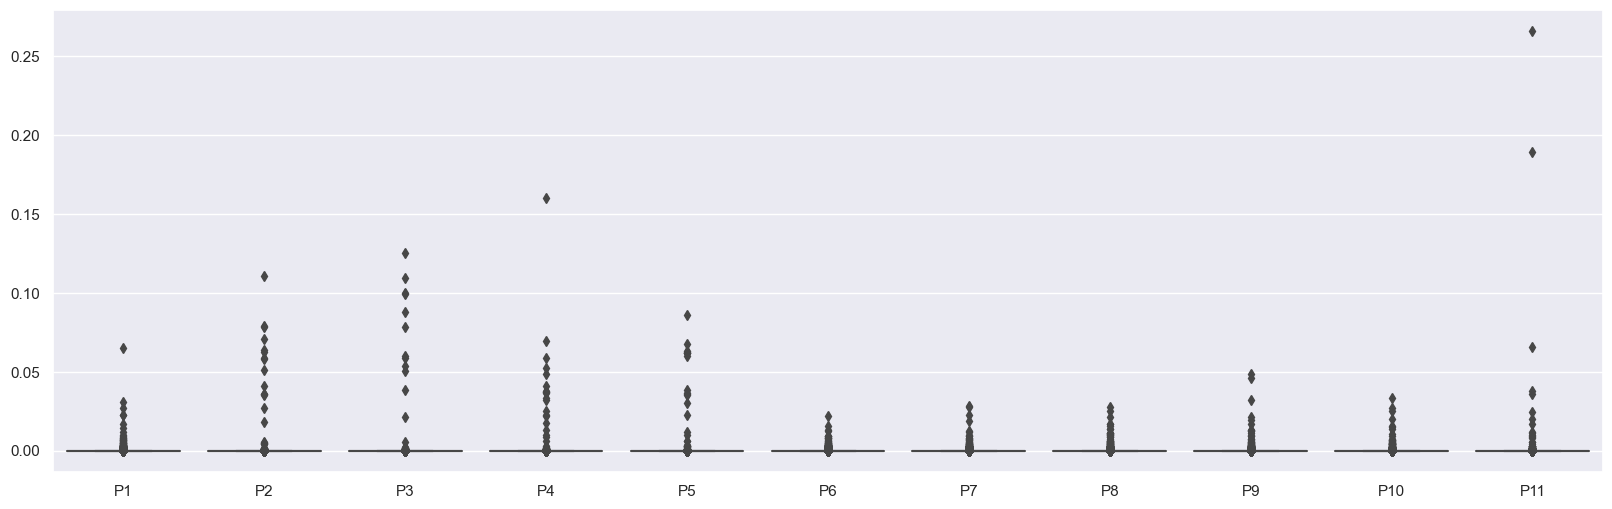

In [17]:
# plt.boxplot(w_ep.iloc[:, 2:13])
sns.set(rc={'figure.figsize':(20,6)})
sns.boxplot(data=w_ep.iloc[:, 2:13])

In [18]:
def get_outliers(wep, metagene):
    #  finding the 1st quartile
    q1 = np.quantile(wep[metagene], 0.25)
    q1
    # # finding the 3rd quartile
    q3 = np.quantile(wep[metagene], 0.75)
    med = np.median(wep[metagene])
    
    # # finding the iqr region
    iqr = q3-q1
    
    # # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)

    # outliers = wep[metagene][(wep[metagene] <= lower_bound) | (wep['P1'] >= upper_bound)]
    outliers = wep[wep[metagene] >= upper_bound].iloc[:, 1:13]

    return outliers

get_outliers(w_ep, 'P1')

p1 = get_outliers(w_ep, 'P1')
p2 = get_outliers(w_ep, 'P2')
p3 = get_outliers(w_ep, 'P3')
p4 = get_outliers(w_ep, 'P4')
p5 = get_outliers(w_ep, 'P5')
p6 = get_outliers(w_ep, 'P6')
p7 = get_outliers(w_ep, 'P7')
p8 = get_outliers(w_ep, 'P8')
p9 = get_outliers(w_ep, 'P9')
p10 = get_outliers(w_ep, 'P10')
p11 = get_outliers(w_ep, 'P11')

# p1.index = p1['Gene\\Patterns']
p3.sort_values(by="P3")

,Gene\Patterns,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11
5013,ENSG00000165476,0.000016,0.000002,0.000001,0.000005,0.000005,0.000018,0.000010,0.000007,0.000010,0.000021,0.000003
7892,ENSG00000105176,0.000007,0.000002,0.000001,0.000007,0.000008,0.000007,0.000009,0.000007,0.000006,0.000009,0.000003
7736,ENSG00000171169,0.000007,0.000003,0.000001,0.000004,0.000003,0.000010,0.000015,0.000015,0.000017,0.000022,0.000007
7957,ENSG00000152683,0.000007,0.000001,0.000001,0.000003,0.000003,0.000014,0.000006,0.000005,0.000003,0.000009,0.000003
12356,ENSG00000185800,0.000002,0.000006,0.000001,0.000034,0.000045,0.000002,0.000024,0.000026,0.000030,0.000040,0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...
7,ENSG00000198727,0.011909,0.058823,0.088056,0.037029,0.060262,0.004534,0.012810,0.009213,0.017216,0.020083,0.016820
9,ENSG00000198899,0.009354,0.063814,0.099156,0.036362,0.062422,0.004381,0.002862,0.015952,0.012542,0.005919,0.009941
4,ENSG00000198886,0.022411,0.070605,0.099701,0.033430,0.062152,0.006124,0.018837,0.017141,0.021387,0.027277,0.020171
19,ENSG00000198804,0.005897,0.079063,0.109666,0.037896,0.067780,0.001735,0.028138,0.021154,0.046295,0.033252,0.035999


In [19]:
ogn = [] # outlier genes of P
for p in [p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11]:
    for g in p['Gene\Patterns '].to_list():
        if g not in ogn:
            ogn.append(g)
olg = w_ep[w_ep['Gene\Patterns '].isin(ogn)] #outlier gene
olg

,#,Gene\Patterns,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,Unnamed: 13,P1/P2,LOG10(P1/P2)
0,1,ENSG00000251562,6.533718e-02,5.058392e-03,2.999541e-06,6.978399e-02,8.595514e-02,2.223366e-03,5.548174e-03,5.687387e-04,9.859969e-03,1.522477e-02,4.196832e-03,NaN,1.291659e+01,1.111148
1,2,ENSG00000210082,3.072829e-02,5.799440e-02,1.261658e-03,5.850421e-02,6.169395e-03,8.515837e-03,2.999906e-04,2.772977e-02,1.356611e-04,3.308072e-06,1.894696e-01,NaN,5.298492e-01,-0.275848
2,3,ENSG00000198712,2.689645e-02,7.866134e-02,1.253141e-01,4.832266e-02,6.291246e-02,2.183752e-02,2.240193e-02,1.358701e-02,3.234989e-02,2.497536e-02,3.762742e-02,NaN,3.419272e-01,-0.466066
3,4,ENSG00000212907,2.252424e-02,1.842493e-02,2.158699e-02,2.196617e-02,3.007891e-02,4.264285e-03,1.201789e-05,1.079264e-02,1.563252e-03,4.159655e-03,3.357914e-03,NaN,1.222487e+00,0.087244
4,5,ENSG00000198886,2.241072e-02,7.060498e-02,9.970088e-02,3.343022e-02,6.215226e-02,6.124456e-03,1.883744e-02,1.714084e-02,2.138671e-02,2.727690e-02,2.017130e-02,NaN,3.174099e-01,-0.498379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25773,25774,ENSG00000277918,2.816145e-09,4.215471e-03,6.291182e-04,9.980030e-03,1.163027e-02,3.592321e-09,2.047938e-08,1.040872e-08,5.142806e-08,1.989926e-08,3.095782e-05,NaN,6.680501e-07,-6.175191
25785,25786,ENSG00000273703,2.395309e-09,1.134430e-04,1.508476e-04,8.517272e-05,1.123106e-04,3.504975e-07,4.371435e-04,3.511042e-08,2.317974e-04,4.960932e-04,1.680209e-04,NaN,2.111465e-05,-4.675416
25790,25791,ENSG00000159184,2.374857e-09,6.519175e-07,4.142608e-07,6.927037e-07,7.523811e-07,4.713635e-05,5.000857e-07,5.869152e-09,1.827954e-07,1.726936e-06,1.805061e-06,NaN,3.642880e-03,-2.438555
25800,25801,ENSG00000184357,2.067844e-09,1.712558e-03,1.790289e-03,1.426538e-04,1.027704e-07,5.536964e-06,3.511444e-03,8.683955e-10,1.400175e-03,5.295516e-03,2.866694e-03,NaN,1.207459e-06,-5.918128


In [20]:
# olgt = olg.iloc[:,2:13].transpose()
# sns.lineplot(data=olgt, color="red", estimator=None, n_boot=0)


Text(0.5, 0.98, ' pathway enrichment distribution ')

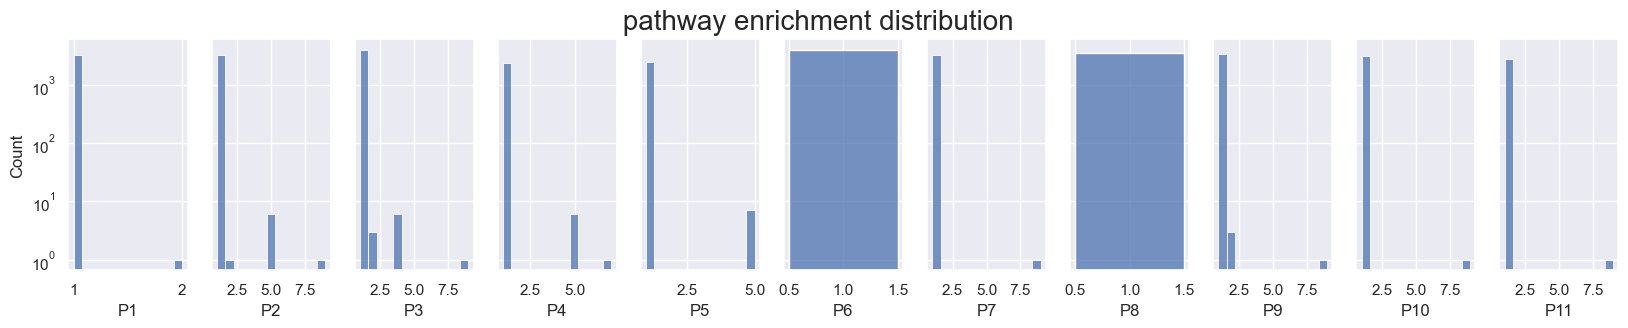

In [21]:
# pp1 = p1.merge(pways, how="left", left_on="Gene\Patterns ", right_on="gene").groupby('hsa').count()
# hg = sns.histplot(data=pp1['P2'])
# hg.set_yscale('log')
# pways
from collections import OrderedDict
ppdb = OrderedDict([('P1',p1),('P2',p2),('P3',p3),('P4',p4),('P5',p5),('P6',p6),('P7',p7),('P8',p8),('P9',p9) ,('P10',p10) ,('P11',p11)])
i=0
fig, axs = plt.subplots(nrows = 1, ncols = 11, figsize=(20,3),sharex=False, sharey=True, facecolor='w', edgecolor='k')
for p, p_df in ppdb.items():
    pp = p_df.merge(pways, how="left", left_on="Gene\Patterns ", right_on="gene").groupby('hsa').count()
    pp = pp.astype(int)
    hg = sns.histplot(data=pp[p], ax=axs[i])
    hg.set_yscale('log')
    # hg.set(xlabel ="abundance", ylabel = "count", title =str(p1))
    i=i+1
fig.suptitle(' pathway enrichment distribution ', fontsize=20)


In [22]:
def abun_path(p_df, pways, p):
    pp = p_df.merge(pways, how="left", left_on="Gene\Patterns ", right_on="gene").groupby(['hsa']).count()
    return pp[pp[p] > 1][[p]]

p1abun = abun_path(p1, pways, "P1")
p2abun = abun_path(p2, pways, "P2")
p2abun
# abun_path(p3, pways, "P3")[['P3']].transpose()

,P2
hsa,
hsa:124904613,5
hsa:124905321,5
hsa:124905573,5
hsa:124905574,5
hsa:124905808,5
hsa:124905809,5
hsa:554313,9
hsa:643836,2


Text(0.5, 0.98, ' abundant pathways across metagenes ')

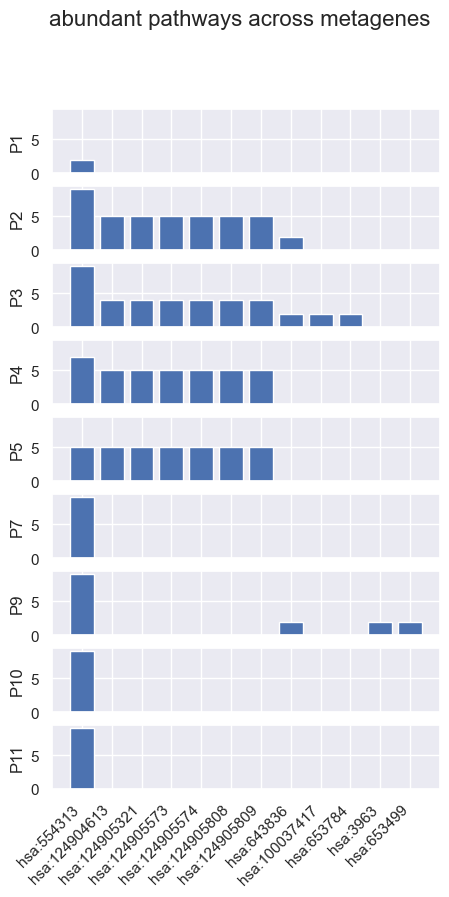

In [23]:
fig.tight_layout()
i=0
fig, axs = plt.subplots(nrows = 9, ncols = 1, figsize=(5,10),sharex=True, sharey=True, facecolor='white', edgecolor='k')
for p, p_df in ppdb.items():
    if p not in ["P6", "P8"]:
        pabun = abun_path(p_df, pways, p)
        axs[i].bar(x = pabun.index , height=pabun[p])
        axs[i].set_ylabel(p)
        i=i+1
        
fig.autofmt_xdate(rotation=45)
fig.suptitle(' abundant pathways across metagenes ', fontsize=16)

In [24]:
w_ep['P1']

0        6.533718e-02
1        3.072829e-02
2        2.689645e-02
3        2.252424e-02
4        2.241072e-02
             ...     
25870    3.777985e-11
25871    2.030426e-11
25872    1.717895e-11
25873    5.428043e-12
25874    7.229113e-13
Name: P1, Length: 25875, dtype: float64

In [25]:
w_ep_f = w_ep.iloc[:, 1:13]
w_ep_f.index = w_ep_f['Gene\Patterns ']
w_ep_f = w_ep_f.iloc[:, 1:13]
w_ep_f


,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11
Gene\Patterns,,,,,,,,,,,
ENSG00000251562,6.533718e-02,5.058392e-03,2.999541e-06,6.978399e-02,8.595514e-02,2.223366e-03,5.548174e-03,5.687387e-04,9.859969e-03,1.522477e-02,4.196832e-03
ENSG00000210082,3.072829e-02,5.799440e-02,1.261658e-03,5.850421e-02,6.169395e-03,8.515837e-03,2.999906e-04,2.772977e-02,1.356611e-04,3.308072e-06,1.894696e-01
ENSG00000198712,2.689645e-02,7.866134e-02,1.253141e-01,4.832266e-02,6.291246e-02,2.183752e-02,2.240193e-02,1.358701e-02,3.234989e-02,2.497536e-02,3.762742e-02
ENSG00000212907,2.252424e-02,1.842493e-02,2.158699e-02,2.196617e-02,3.007891e-02,4.264285e-03,1.201789e-05,1.079264e-02,1.563252e-03,4.159655e-03,3.357914e-03
ENSG00000198886,2.241072e-02,7.060498e-02,9.970088e-02,3.343022e-02,6.215226e-02,6.124456e-03,1.883744e-02,1.714084e-02,2.138671e-02,2.727690e-02,2.017130e-02
...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000223631,3.777985e-11,1.476117e-11,3.634849e-10,8.129469e-12,1.055216e-11,3.345031e-09,3.252867e-10,2.173862e-09,2.441571e-10,1.596039e-14,3.070016e-09
ENSG00000186086,2.030426e-11,8.502464e-12,6.927042e-10,1.337442e-08,1.127197e-09,1.545857e-11,1.472101e-10,5.312444e-10,1.330363e-09,1.712296e-09,6.788566e-10
ENSG00000278080,1.717895e-11,5.208973e-10,4.398439e-09,3.682868e-08,8.682476e-10,1.677412e-08,2.388142e-09,5.681887e-10,7.704855e-09,1.650305e-08,3.313735e-09


In [26]:
def calculate_log2_ratios(df):
    columns = df.columns
    ratio_df = pd.DataFrame()
    for col1, col2 in itertools.permutations(columns, 2):
        ratio = df[col1] / df[col2]
        log2_ratio = np.log2(ratio)
        ratio_df[f"{col1}/{col2}"] = ratio
    return ratio_df
w_ep_fc = calculate_log2_ratios(w_ep_f)
w_ep_fc

/var/folders/_y/v6jgnhsn30sd9g2phyp5_5bh000xd6/T/ipykernel_9001/1912619514.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ratio_df[f"{col1}/{col2}"] = ratio
/var/folders/_y/v6jgnhsn30sd9g2phyp5_5bh000xd6/T/ipykernel_9001/1912619514.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ratio_df[f"{col1}/{col2}"] = ratio
/var/folders/_y/v6jgnhsn30sd9g2phyp5_5bh000xd6/T/ipykernel_9001/1912619514.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has p

,P1/P2,P1/P3,P1/P4,P1/P5,P1/P6,P1/P7,P1/P8,P1/P9,P1/P10,P1/P11,...,P11/P1,P11/P2,P11/P3,P11/P4,P11/P5,P11/P6,P11/P7,P11/P8,P11/P9,P11/P10
Gene\Patterns,,,,,,,,,,,,,,,,,,,,,
ENSG00000251562,12.916590,21782.395611,0.936278,0.760131,29.386600,11.776340,114.880835,6.626510,4.291504,15.568214,...,0.064233,0.829677,1399.158258,0.060140,0.048826,1.887603,0.756435,7.379191,0.425644,0.275658
ENSG00000210082,0.529849,24.355481,0.525232,4.980762,3.608370,102.430843,1.108134,226.507748,9288.882100,0.162181,...,6.165968,3.267034,150.175127,3.238564,30.711218,22.249093,631.585332,6.832716,1396.639597,57274.952656
ENSG00000198712,0.341927,0.214632,0.556601,0.427522,1.231662,1.200631,1.979571,0.831423,1.076919,0.714810,...,1.398973,0.478347,0.300265,0.778670,0.598092,1.723063,1.679651,2.769366,1.163139,1.506581
ENSG00000212907,1.222487,1.043417,1.025406,0.748838,5.282066,1874.225675,2.087001,14.408580,5.414929,6.707807,...,0.149080,0.182248,0.155553,0.152868,0.111637,0.787451,279.409597,0.311130,2.148031,0.807258
ENSG00000198886,0.317410,0.224780,0.670373,0.360578,3.659218,1.189690,1.307446,1.047881,0.821601,1.111020,...,0.900074,0.285692,0.202318,0.603385,0.324547,3.293566,1.070809,1.176798,0.943170,0.739501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000223631,2.559408,0.103938,4.647272,3.580296,0.011294,0.116143,0.017379,0.154736,2367.100234,0.012306,...,81.260677,207.979191,8.446064,377.640457,290.937257,0.917784,9.437878,1.412241,12.573939,192352.168271
ENSG00000186086,2.388044,0.029312,0.001518,0.018013,1.313463,0.137927,0.038220,0.015262,0.011858,0.029909,...,33.434198,79.842342,0.980009,0.050758,0.602252,43.914591,4.611481,1.277861,0.510279,0.396460
ENSG00000278080,0.032980,0.003906,0.000466,0.019786,0.001024,0.007193,0.030235,0.002230,0.001041,0.005184,...,192.895124,6.361591,0.753389,0.089977,3.816579,0.197550,1.387579,5.832104,0.430084,0.200795


In [27]:
# w_ep[w_ep > 0.03]
w_epv = w_ep.iloc[:, 1:13]
w_epv.index = w_ep['Gene\Patterns ']
w_epv = w_epv.iloc[:, 1:13]
w_epv

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11
Gene\Patterns,,,,,,,,,,,
ENSG00000251562,6.533718e-02,5.058392e-03,2.999541e-06,6.978399e-02,8.595514e-02,2.223366e-03,5.548174e-03,5.687387e-04,9.859969e-03,1.522477e-02,4.196832e-03
ENSG00000210082,3.072829e-02,5.799440e-02,1.261658e-03,5.850421e-02,6.169395e-03,8.515837e-03,2.999906e-04,2.772977e-02,1.356611e-04,3.308072e-06,1.894696e-01
ENSG00000198712,2.689645e-02,7.866134e-02,1.253141e-01,4.832266e-02,6.291246e-02,2.183752e-02,2.240193e-02,1.358701e-02,3.234989e-02,2.497536e-02,3.762742e-02
ENSG00000212907,2.252424e-02,1.842493e-02,2.158699e-02,2.196617e-02,3.007891e-02,4.264285e-03,1.201789e-05,1.079264e-02,1.563252e-03,4.159655e-03,3.357914e-03
ENSG00000198886,2.241072e-02,7.060498e-02,9.970088e-02,3.343022e-02,6.215226e-02,6.124456e-03,1.883744e-02,1.714084e-02,2.138671e-02,2.727690e-02,2.017130e-02
...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000223631,3.777985e-11,1.476117e-11,3.634849e-10,8.129469e-12,1.055216e-11,3.345031e-09,3.252867e-10,2.173862e-09,2.441571e-10,1.596039e-14,3.070016e-09
ENSG00000186086,2.030426e-11,8.502464e-12,6.927042e-10,1.337442e-08,1.127197e-09,1.545857e-11,1.472101e-10,5.312444e-10,1.330363e-09,1.712296e-09,6.788566e-10
ENSG00000278080,1.717895e-11,5.208973e-10,4.398439e-09,3.682868e-08,8.682476e-10,1.677412e-08,2.388142e-09,5.681887e-10,7.704855e-09,1.650305e-08,3.313735e-09


In [28]:
w_epv03 = w_epv[w_epv > 0.03].dropna(how="all")
w_epv03


,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11
Gene\Patterns,,,,,,,,,,,
ENSG00000251562,0.065337,NaN,NaN,0.069784,0.085955,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000210082,0.030728,0.057994,NaN,0.058504,NaN,NaN,NaN,NaN,NaN,NaN,0.189470
ENSG00000198712,NaN,0.078661,0.125314,0.048323,0.062912,NaN,NaN,NaN,0.032350,NaN,0.037627
ENSG00000212907,NaN,NaN,NaN,NaN,0.030079,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000198886,NaN,0.070605,0.099701,0.033430,0.062152,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000198727,NaN,0.058823,0.088056,0.037029,0.060262,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000198899,NaN,0.063814,0.099156,0.036362,0.062422,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000198804,NaN,0.079063,0.109666,0.037896,0.067780,NaN,NaN,NaN,0.046295,0.033252,0.035999
ENSG00000228253,NaN,0.051117,0.078503,0.037380,0.062028,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
for x in itertools.permutations(['p1', 'p2'], 2):
    print(x)

('p1', 'p2')
('p2', 'p1')


In [30]:
w_epv[w_epv['P8'] > 0.03].dropna(how="all")
w_epv['P8'].sort_values(ascending=False)

Gene\Patterns 
ENSG00000210082    2.772977e-02
ENSG00000169429    2.519418e-02
ENSG00000198804    2.115376e-02
ENSG00000198888    1.721338e-02
ENSG00000198886    1.714084e-02
                       ...     
ENSG00000223569    2.918749e-11
ENSG00000247867    1.517739e-11
ENSG00000186297    1.101403e-11
ENSG00000239827    1.045682e-11
ENSG00000187037    3.050504e-12
Name: P8, Length: 25875, dtype: float64

In [45]:
# w_ep['P1']/w_ep['P6']

p6_fc = w_ep_fc[[r for r in w_ep_fc.columns if '/P6' in r]]
p6_fc

,P1/P6,P2/P6,P3/P6,P4/P6,P5/P6,P7/P6,P8/P6,P9/P6,P10/P6,P11/P6
Gene\Patterns,,,,,,,,,,
ENSG00000251562,29.386600,2.275105,0.001349,31.386633,38.659906,2.495393,0.255801,4.434703,6.847623,1.887603
ENSG00000210082,3.608370,6.810182,0.148154,6.870048,0.724461,0.035227,3.256259,0.015930,0.000388,22.249093
ENSG00000198712,1.231662,3.602118,5.738475,2.212827,2.880934,1.025846,0.622187,1.481390,1.143690,1.723063
ENSG00000212907,5.282066,4.320755,5.062276,5.151196,7.053681,0.002818,2.530937,0.366592,0.975464,0.787451
ENSG00000198886,3.659218,11.528367,16.279139,5.458480,10.148208,3.075773,2.798753,3.492018,4.453766,3.293566
...,...,...,...,...,...,...,...,...,...,...
ENSG00000223631,0.011294,0.004413,0.108664,0.002430,0.003155,0.097245,0.649878,0.072991,0.000005,0.917784
ENSG00000186086,1.313463,0.550016,44.810374,865.178318,72.917328,9.522883,34.365695,86.059911,110.766826,43.914591
ENSG00000278080,0.001024,0.031054,0.262216,2.195565,0.051761,0.142371,0.033873,0.459330,0.983840,0.197550


/Users/migun/miniconda3/envs/resp2virus-env/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


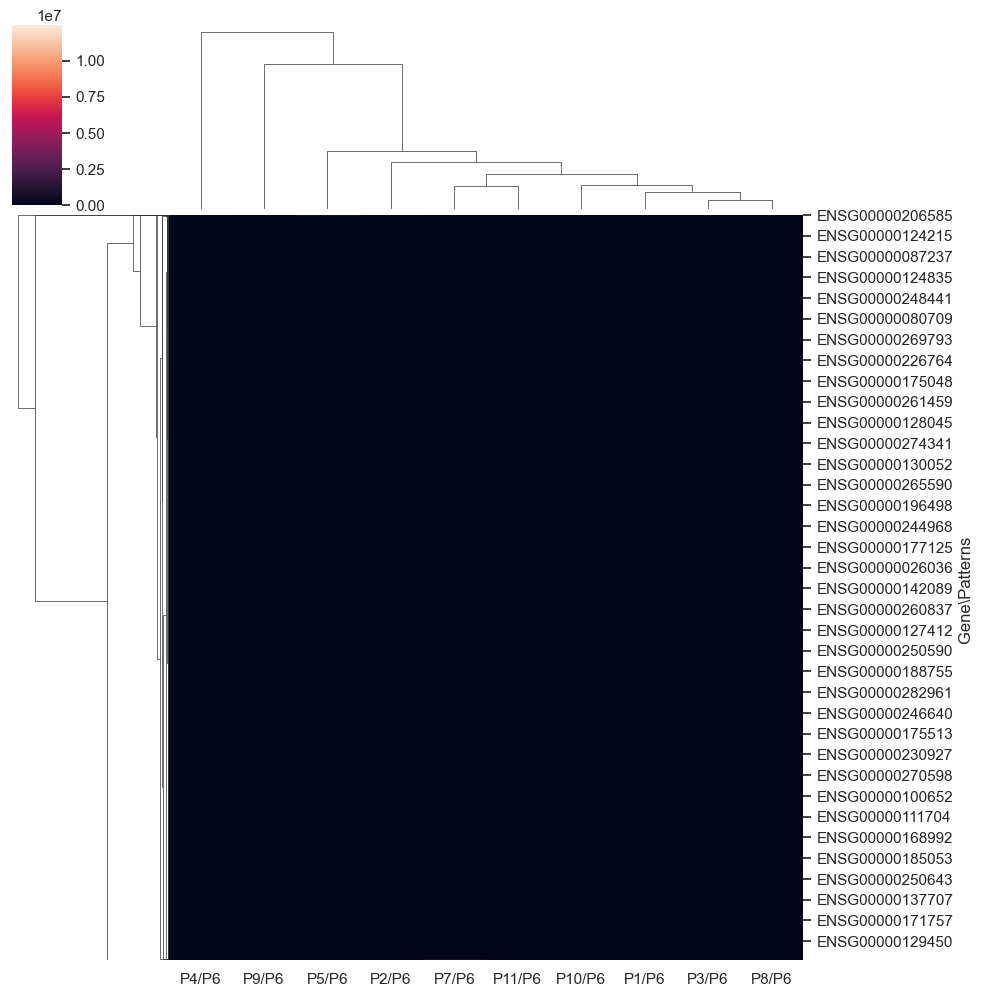

In [46]:

p6_fc_1 = p6_fc[p6_fc > 10].dropna(how="all")
p6_fc_1 = p6_fc_1.dropna(how="all")
p6_fc_1 = p6_fc_1.fillna(0)
sns.set(rc={'figure.figsize':(6,20)})
sns.clustermap(p6_fc_1)

In [44]:
p6_fc_1

,P1/P6,P2/P6,P3/P6,P4/P6,P5/P6,P7/P6,P8/P6,P9/P6,P10/P6,P11/P6,sum
Gene\Patterns,,,,,,,,,,,
ENSG00000251562,29.3866,0.000000,0.000000,31.386633,38.659906,0.000000,0.000000,0.000000,0.000000,0.000000,117.630716
ENSG00000210082,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.249093,43.718114
ENSG00000198712,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.662192
ENSG00000212907,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.533235
ENSG00000198886,0.0000,11.528367,16.279139,0.000000,10.148208,0.000000,0.000000,0.000000,0.000000,0.000000,64.187289
...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000226519,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.609838
ENSG00000281379,0.0000,0.000000,13.972531,16.518493,24.855193,0.000000,0.000000,16.910248,0.000000,31.744801,124.002044
ENSG00000187736,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.062957


In [54]:
p6_fc['sum'] = p6_fc.sum(axis=1)
p6_fc_top10 = p6_fc.sort_values(by=["sum"], ascending=False).iloc[:100, :]
p6_fc_top10

/var/folders/_y/v6jgnhsn30sd9g2phyp5_5bh000xd6/T/ipykernel_9001/1591941875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p6_fc['sum'] = p6_fc.sum(axis=1)


,P1/P6,P2/P6,P3/P6,P4/P6,P5/P6,P7/P6,P8/P6,P9/P6,P10/P6,P11/P6,sum
Gene\Patterns,,,,,,,,,,,
ENSG00000263934,1.281184,5.057953e+05,81081.651811,2.978344e+06,3.323974e+06,2.553385e+06,3.661153,7.039260e+05,6.119617e+05,2.262383e+06,3.906257e+07
ENSG00000161055,163039.263896,2.151905e+05,2362.278757,5.959105e+03,2.354178e+01,7.561417e+04,23463.125734,1.098231e+07,1.271138e+06,1.588284e+05,3.869378e+07
ENSG00000206585,5.124593,2.411076e+04,8.593400,1.247694e+07,1.188860e+02,1.491963e+03,3.664842,5.270645e+01,3.668778e+02,3.039178e+03,3.751841e+07
ENSG00000277918,0.783935,1.173467e+06,175128.611130,2.778156e+06,3.237537e+06,5.700875e+00,2.897493,1.431611e+01,5.539388e+00,8.617777e+03,2.211881e+07
ENSG00000184292,923836.598849,9.196805e+04,15821.900426,2.260378e+04,3.147899e+04,1.449016e+06,214540.520861,1.049529e+06,1.236246e+06,4.166181e+04,1.523011e+07
...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000179869,37.270021,4.190047e+02,32.111595,1.005831e+04,1.204840e+04,8.220215e+03,16.507682,1.137751e+03,3.151423e+03,2.364997e+03,1.124580e+05
ENSG00000174950,1027.781199,1.025497e+03,6.320701,2.815598e+03,4.027217e+03,1.723597e+04,165.157287,1.094422e+04,2.942300e+00,1.794918e+02,1.122906e+05
ENSG00000176855,5401.047279,1.495551e+03,1326.426972,4.928746e+02,9.402084e+02,8.392088e+03,0.896428,5.020050e+03,1.314456e+04,9.301300e+02,1.114315e+05


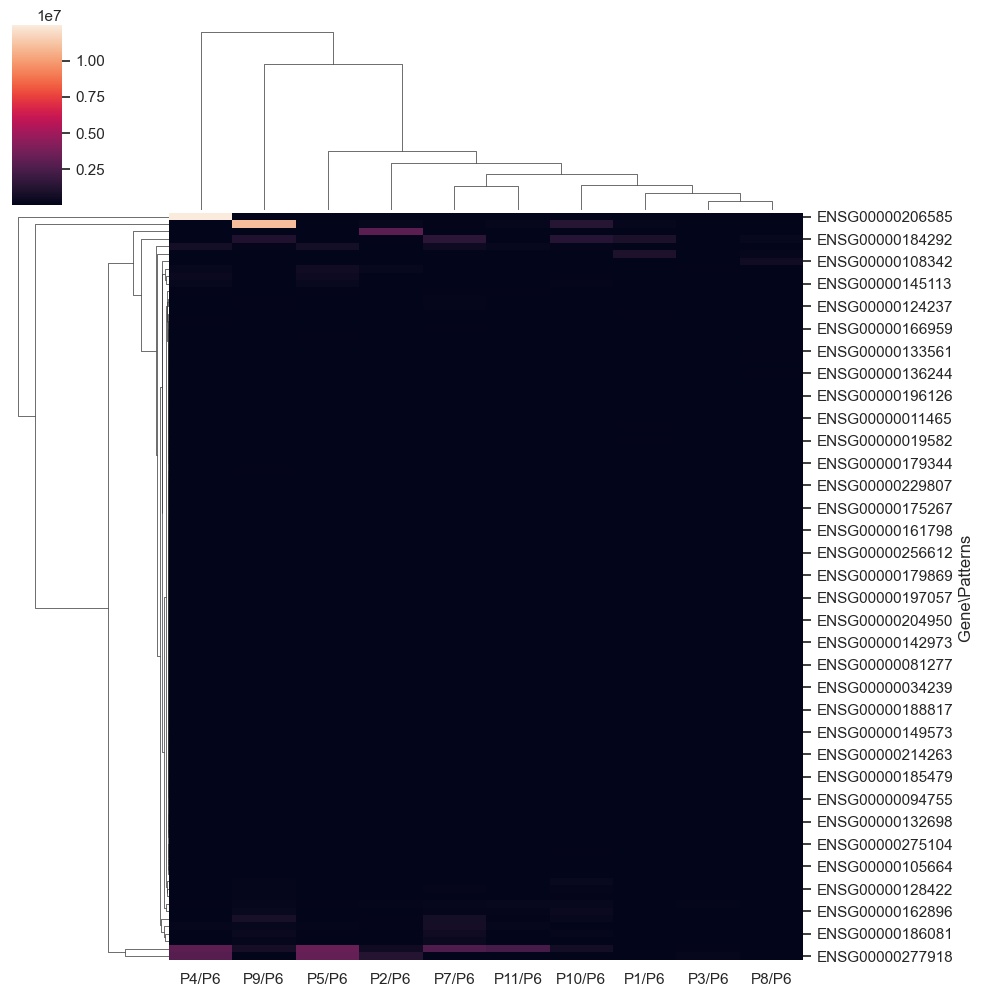

In [51]:
sns.set(rc={'figure.figsize':(6,20)})
sns.clustermap(p6_fc_top10.iloc[:,:10])

In [52]:
pways

,gene,hsa,description
0,ENSG00000198888,hsa:4535,Oxidative_phosphorylation;Metabolic_pathways;T...
1,ENSG00000198763,hsa:4536,Oxidative_phosphorylation;Metabolic_pathways;T...
2,ENSG00000198804,hsa:4512,Oxidative_phosphorylation;Metabolic_pathways;C...
3,ENSG00000210151,hsa:113219467,NaN
4,ENSG00000198712,hsa:4513,Oxidative_phosphorylation;Metabolic_pathways;C...
...,...,...,...
36355,ENSG00000162543,hsa:127733,NaN
36356,ENSG00000134686,hsa:1912,NaN
36357,ENSG00000159023,hsa:2035,NaN
36358,ENSG00000198216,hsa:777,MAPK_signaling_pathway;Calcium_signaling_pathw...


In [57]:
p6_fc_top10.merge(pways, how="left", left_index=True, right_on="gene").to_excel("fc_over_p6_top100.xlsx", index=False)

TypeError: NDFrame.to_excel() got an unexpected keyword argument 'sep'